# Objects Interface - Kreiranje kompleksnih vizualizacija

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236  
**Datum:** 23.07.2025.

---

Fokus ove lekcije je na podešavanju svojstava „Mark“ objekata (direktno setovanje, mapiranje i parametrizacija kroz scale) u seaborn.objects interfejsu.

## 1. **Šta je Objects Interface?**

Seaborn Objects Interface je **nova generacija** API-ja za kreiranje statističkih grafika inspirisana **Grammar of Graphics**. Omogućava kreiranje složenih vizualizacija kroz kombinovanje osnovnih komponenti.

**Ključne komponente:**
- **Plot** - glavni objekat koji sadrži podatke i mapiranja
- **Mark** - vizuelni elementi (Dot, Line, Bar, Area, itd.)
- **Stat** - statističke transformacije (Agg, KDE, Hist, itd.)
- **Move** - poziciona podešavanja (Dodge, Jitter, Stack, itd.)
- **Scale** - mapiranje podataka na vizuelne atribute

**Prednosti Objects Interface:**
- 🧩 **Kompozabilnost** - kombinovanje različitih komponenti
- 🎨 **Fleksibilnost** - precizna kontrola nad svakim aspektom
- 📊 **Konzistentnost** - ista sintaksa za sve tipove grafika
- ⚡ **Performanse** - optimizovano za velike datasets

**Osnovna sintaksa:**
```python
(
    so.Plot(data, x="var1", y="var2")
    .add(so.Mark(), so.Stat(), so.Move())
    .scale(aesthetic="mapping")
    .show()
)
```

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Uvoz Objects interface
try:
    import seaborn.objects as so
    objects_available = True
    # Preferiraj oštar vektorski prikaz u notebook-u
    try:
        so.Plot.config.display["format"] = "svg"
    except Exception:
        pass
    print("✅ Seaborn Objects Interface dostupan!")
except ImportError:
    objects_available = False
    print("⚠️ Objects interface nije dostupan")

# Podešavanje
sns.set_theme(style="whitegrid", context="talk")
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

# Učitavanje podataka
tips = sns.load_dataset('tips')
penguins = sns.load_dataset('penguins')
flights = sns.load_dataset('flights')
diamonds = sns.load_dataset('diamonds')

# Priprema vremenske serije iz flights dataseta (umesto nedostupnog 'dowjones')
flights_ts = (
    flights.assign(
        Date=pd.to_datetime(
            flights['year'].astype(str) + '-' + flights['month'].astype(str),
            format='%Y-%b'
        ),
        Passengers=flights['passengers']
    )
    .sort_values('Date')
)

print(f"📊 Seaborn verzija: {sns.__version__}")
print(f"📈 Tips dataset: {tips.shape}")
print(f"🐧 Penguins dataset: {penguins.shape}")
print(f"✈️ Flights dataset (raw): {flights.shape}")
print(f"📈 Flights time-series: {flights_ts.shape}")
print(f"💎 Diamonds dataset: {diamonds.shape}")

print("\n🎯 U OVOM NOTEBOOK-u ĆEMO NAUČITI:")
print("• Osnovne Mark objekte (Dot, Line, Bar, Area)")
print("• Kombinovanje Mark-ova sa Stat transformacijama")
print("• Napredne tehnike sa Move objektima")
print("• Praktične primere za različite tipove podataka")
print("• Kreiranje publication-ready grafika")


✅ Seaborn Objects Interface dostupan!
📊 Seaborn verzija: 0.13.2
📈 Tips dataset: (244, 7)
🐧 Penguins dataset: (344, 7)
✈️ Flights dataset (raw): (144, 3)
📈 Flights time-series: (144, 5)
💎 Diamonds dataset: (53940, 10)

🎯 U OVOM NOTEBOOK-u ĆEMO NAUČITI:
• Osnovne Mark objekte (Dot, Line, Bar, Area)
• Kombinovanje Mark-ova sa Stat transformacijama
• Napredne tehnike sa Move objektima
• Praktične primere za različite tipove podataka
• Kreiranje publication-ready grafika


## 2. **Mark objekti - Osnovni gradivni blokovi**

**Mark objekti** definišu kako se podaci vizuelno predstavljaju. Svaki Mark ima specifičnu ulogu:

| **Mark** | **Upotreba** | **Najbolji za** |
|----------|-------------|------------------|
| `so.Dot()` | Tačke | Scatter plots, korelacije |
| `so.Line()` | Linije | Vremenske serije, trendovi |
| `so.Bar()` | Barovi | Kategorijske podatke |
| `so.Bars()` | Barovi (optimizovani) | Histograme nad kontinuiranim podacima |
| `so.Area()` | Područja | Distribucije, KDE |
| `so.Range()` | Interval linije | Error bars, min/max intervali |
| `so.Dash()` | Kratki segmenti | Diskretne oznake po posmatranju |
| `so.Band()` | Pojasevi | Confidence intervals |
| `so.Text()` | Tekst | Anotacije, labeli |

Demonstracija osnovnih Mark objekata:

✅ Koristi se Objects Interface


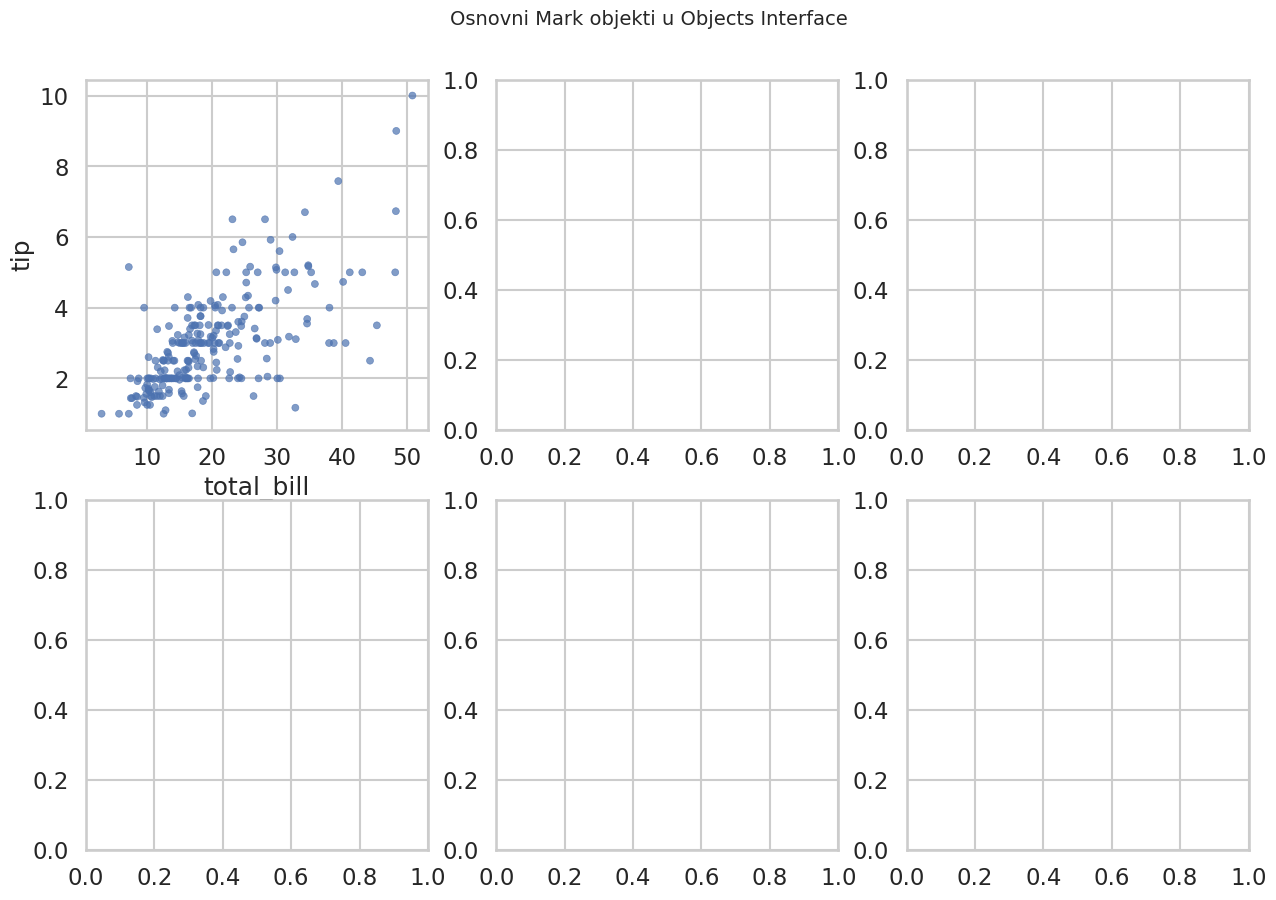

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Demonstracija osnovnih Mark objekata
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Osnovni Mark objekti u Objects Interface', fontsize=14, y=0.95)

if objects_available:
    print("✅ Koristi se Objects Interface")
    
    # 1. Dot Mark - scatter plot
    try:
        p = so.Plot(tips, x="total_bill", y="tip")
        p.add(so.Dot(pointsize=5, alpha=0.7)).on(axes[0,0]).show()
        axes[0,0].set_title('1. Dot Mark - Scatter')
    except Exception:
        sns.scatterplot(data=tips, x="total_bill", y="tip", alpha=0.7, ax=axes[0,0])
        axes[0,0].set_title('1. Dot Mark (fallback)')
    
    # 2. Line Mark - vremenske serije (flights_ts)
    try:
        p = so.Plot(flights_ts.head(120), x="Date", y="Passengers")
        p.add(so.Line(linewidth=2, color="darkblue")).on(axes[0,1]).show()
        axes[0,1].set_title('2. Line Mark - Time Series (Flights)')
    except Exception:
        sns.lineplot(data=flights_ts.head(120), x="Date", y="Passengers", 
                    linewidth=2, color="darkblue", ax=axes[0,1])
        axes[0,1].set_title('2. Line Mark (fallback)')
    
    # 3. Bar Mark sa agregacijom
    try:
        p = so.Plot(tips, x="day", y="total_bill")
        p.add(so.Bar(), so.Agg(func="mean")).on(axes[0,2]).show()
        axes[0,2].set_title('3. Bar Mark + Agg (mean)')
    except Exception:
        sns.barplot(data=tips, x="day", y="total_bill", ax=axes[0,2])
        axes[0,2].set_title('3. Bar Mark (fallback)')
    
    # 4. Area Mark sa KDE
    try:
        p = so.Plot(tips, x="total_bill")
        p.add(so.Area(alpha=0.6), so.KDE()).on(axes[1,0]).show()
        axes[1,0].set_title('4. Area Mark + KDE')
    except Exception:
        sns.kdeplot(data=tips, x="total_bill", fill=True, alpha=0.6, ax=axes[1,0])
        axes[1,0].set_title('4. Area Mark (fallback)')
    
    # 5. Dash Mark
    try:
        p = so.Plot(penguins, x="species", y="body_mass_g", color="sex")
        p.add(so.Dash()).on(axes[1,1]).show()
        axes[1,1].set_title('5. Dash Mark')
    except Exception:
        sns.pointplot(data=penguins, x="species", y="body_mass_g", 
                     hue="sex", ax=axes[1,1])
        axes[1,1].set_title('5. Dash Mark (fallback)')
    
    # 6. Kombinacija Mark-ova
    try:
        p = so.Plot(tips, x="total_bill", y="tip")
        p.add(so.Dot(alpha=0.5, color="lightgray")).add(
            so.Line(color="red"), so.PolyFit(order=1)
        ).on(axes[1,2]).show()
        axes[1,2].set_title('6. Kombinacija Dot + Line')
    except Exception:
        sns.scatterplot(data=tips, x="total_bill", y="tip", 
                       alpha=0.5, color="lightgray", ax=axes[1,2])
        sns.regplot(data=tips, x="total_bill", y="tip", 
                   scatter=False, color="red", ax=axes[1,2])
        axes[1,2].set_title('6. Kombinacija (fallback)')

else:
    print("⚠️ Objects interface nije dostupan, koristi se traditionalni pristup")
    
    # Fallback sa traditionalnim seaborn funkcijama
    sns.scatterplot(data=tips, x="total_bill", y="tip", ax=axes[0,0])
    axes[0,0].set_title('1. Scatter Plot')
    
    sns.lineplot(data=flights_ts.head(120), x="Date", y="Passengers", ax=axes[0,1])
    axes[0,1].set_title('2. Line Plot')
    
    sns.barplot(data=tips, x="day", y="total_bill", ax=axes[0,2])
    axes[0,2].set_title('3. Bar Plot')
    
    sns.kdeplot(data=tips, x="total_bill", fill=True, ax=axes[1,0])
    axes[1,0].set_title('4. KDE Plot')
    
    sns.pointplot(data=penguins, x="species", y="body_mass_g", hue="sex", ax=axes[1,1])
    axes[1,1].set_title('5. Point Plot')
    
    sns.regplot(data=tips, x="total_bill", y="tip", ax=axes[1,2])
    axes[1,2].set_title('6. Regression Plot')

# Rotacija labela za bolje čitanje
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. **Kombinovanje Mark-ova sa Stat objektima**

**Stat objekti** transformišu podatke pre vizualizacije:

- `so.Agg()` - agregacija (mean, sum, count)
- `so.KDE()` - kernel density estimation
- `so.Hist()` - histogram binning
- `so.PolyFit()` - polynomial fitting
- `so.Est()` - statistical estimation

Demonstacija kombinovanja:

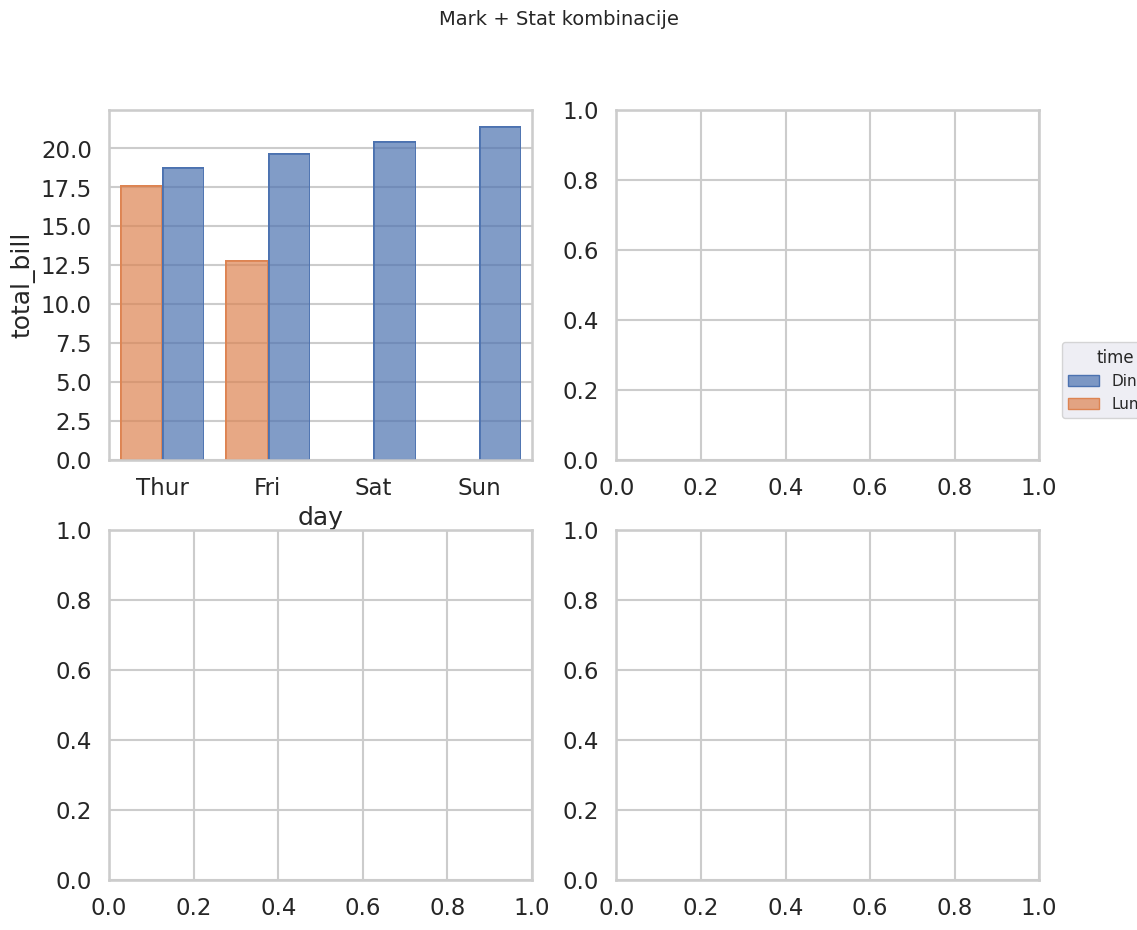

<Figure size 1200x800 with 0 Axes>


✅ KOMBINACIJE MARK + STAT:
• Bar + Agg: kategorijske analize sa agregacijom
• Area + KDE: glatke distribucije
• Dot + Line + PolyFit: regresijska analiza
• Range + Est + Dodge: error bars posle agregacije s grupisanjem


In [9]:
# Kombinovanje Mark-ova sa Stat objektima
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Mark + Stat kombinacije', fontsize=14)

if objects_available:
    # 1. Bar + Agg - kategorijske analize (mean + dodge)
    try:
        p = so.Plot(tips, x="day", y="total_bill", color="time")
        p.add(so.Bar(), so.Agg(func="mean"), so.Dodge()).on(axes[0,0]).show()
        axes[0,0].set_title('Bar + Agg + Dodge')
    except Exception:
        sns.barplot(data=tips, x="day", y="total_bill", hue="time", ax=axes[0,0])
        axes[0,0].set_title('Bar + Agg (fallback)')

    # 2. Area + KDE - distribucije
    try:
        p = so.Plot(penguins, x="flipper_length_mm", color="species")
        p.add(so.Area(alpha=0.6), so.KDE()).on(axes[0,1]).show()
        axes[0,1].set_title('Area + KDE')
    except Exception:
        for species in penguins['species'].unique():
            if pd.notna(species):
                data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
                sns.kdeplot(data, fill=True, alpha=0.6, label=species, ax=axes[0,1])
        axes[0,1].legend()
        axes[0,1].set_title('Area + KDE (fallback)')

    # 3. Dot + Line + PolyFit - regresijska analiza
    try:
        p = so.Plot(tips, x="total_bill", y="tip")
        p.add(so.Dot(alpha=0.6, color="gray")).add(
            so.Line(color="red", linewidth=2), so.PolyFit(order=1)
        ).on(axes[1,0]).show()
        axes[1,0].set_title('Dot + Line + PolyFit')
    except Exception:
        sns.scatterplot(data=tips, x="total_bill", y="tip", 
                       alpha=0.6, color="gray", ax=axes[1,0])
        sns.regplot(data=tips, x="total_bill", y="tip", 
                   scatter=False, color="red", ax=axes[1,0])
        axes[1,0].set_title('Regresija (fallback)')

    # 4. Range + Est - error bars posle agregacije
    try:
        p = so.Plot(penguins.dropna(), x="species", y="body_mass_g", color="sex")
        p.add(so.Range(), so.Est(errorbar="sd"), so.Dodge()).add(
            so.Dot(pointsize=6), so.Agg(func="mean"), so.Dodge()
        ).on(axes[1,1]).show()
        axes[1,1].set_title('Range + Est + Dodge (error bars)')
    except Exception:
        sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", capsize=0.1, ax=axes[1,1])
        axes[1,1].set_title('Grouped Bar Chart (fallback)')

else:
    # Fallback sa tradicionalnim seaborn-om
    sns.barplot(data=tips, x="day", y="total_bill", hue="time", ax=axes[0,0])
    axes[0,0].set_title('Grouped Bar Plot')
    
    for species in penguins['species'].unique():
        if pd.notna(species):
            data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
            if len(data) > 0:
                sns.kdeplot(data, fill=True, alpha=0.6, label=species, ax=axes[0,1])
    axes[0,1].legend()
    axes[0,1].set_title('Multiple KDE')
    
    sns.regplot(data=tips, x="total_bill", y="tip", ax=axes[1,0])
    axes[1,0].set_title('Regression Plot')
    
    sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", ax=axes[1,1])
    axes[1,1].set_title('Bar + SE')

plt.tight_layout()
plt.show()

print("\n✅ KOMBINACIJE MARK + STAT:")
print("• Bar + Agg: kategorijske analize sa agregacijom")
print("• Area + KDE: glatke distribucije")
print("• Dot + Line + PolyFit: regresijska analiza")
print("• Range + Est + Dodge: error bars posle agregacije s grupisanjem")

## 4. **Move objekti - Poziciona podešavanja**

**Move objekti** rešavaju probleme preklapanja i utiču samo na x/y koordinate (bez promene vrednosti):

- `so.Dodge()` - pomera i sužava elemente duž orijentacije (npr. poredjano po hue-u)
- `so.Jitter()` - dodaje slučajan šum da se izbegne preklapanje
- `so.Stack()` - slaže vrednosti po value osi (kumulativno)
- `so.Shift()` - pomera sve elemente za fiksnu vrednost
- `so.Norm()` - normalizuje vrednosti posle agregacije (npr. procenti)

**Praktični primeri Move objekata:**

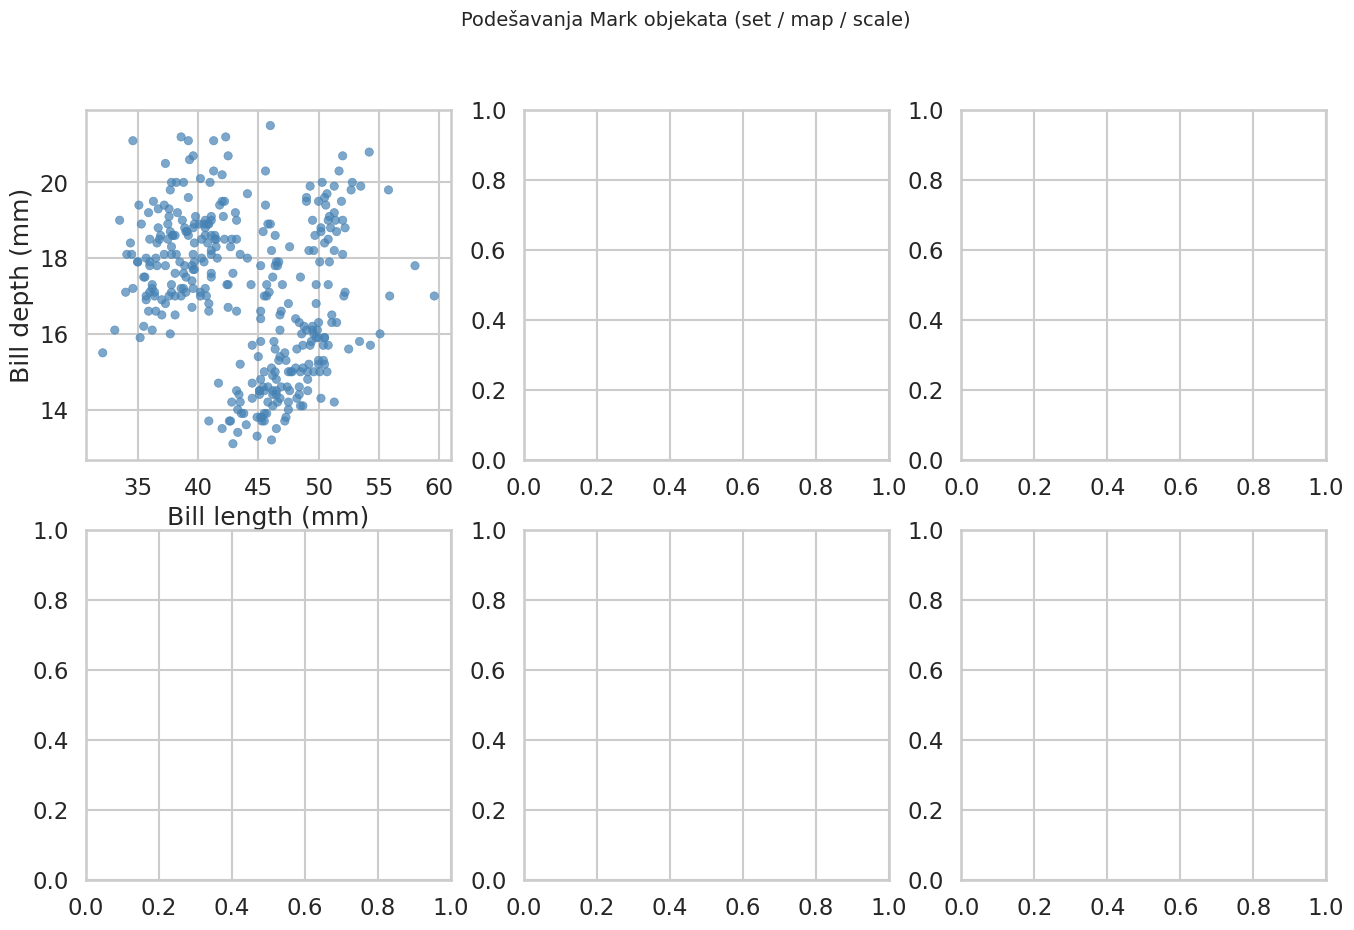

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Podešavanja Mark objekata: set vs map vs scale
if objects_available:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle('Podešavanja Mark objekata (set / map / scale)', fontsize=14)

    # 1. Dot - direktno setovanje (konstante)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
        .add(so.Dot(color="steelblue", pointsize=6, alpha=.7))
        .label(x="Bill length (mm)", y="Bill depth (mm)")
        .on(axes[0,0]).show()
    )
    axes[0,0].set_title('Dot: direktno setovanje (konstante)')

    # 2. Dot - mapiranje (color, pointsize, marker) + scale
    (
        so.Plot(
            penguins, x="bill_length_mm", y="bill_depth_mm",
            color="species", pointsize="body_mass_g", marker="sex"
        )
        .add(so.Dot(alpha=.6))
        .scale(color="Set2", pointsize=(3, 10), marker=so.Nominal(["o", "+"]))
        .label(color="Species", pointsize="Body mass (g)", marker="Sex")
        .on(axes[0,1]).show()
    )
    axes[0,1].set_title('Dot: mapiranje + scale (boja, veličina, marker)')

    # 3. Dot - ivice kao semantika (edgecolor, edgewidth)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm", edgecolor="sex", edgewidth="body_mass_g")
        .add(so.Dot(color=".8", pointsize=7))
        .label(edgecolor="Sex", edgewidth="Body mass (g)")
        .on(axes[0,2]).show()
    )
    axes[0,2].set_title('Dot: ivice kao semantika (edge)')

    # 4. Line - mapiranje boje i palete
    (
        so.Plot(flights_ts, x="Date", y="Passengers", color="year")
        .add(so.Line())
        .scale(color="viridis")
        .label(color="Year")
        .on(axes[1,0]).show()
    )
    axes[1,0].set_title('Line: mapiranje boje + paleta')

    # 5. Bar - Dodge + set ivica i ispune
    (
        so.Plot(tips, x="day", y="total_bill", color="time")
        .add(so.Bar(edgecolor=".2", edgewidth=1.2), so.Agg("mean"), so.Dodge())
        .scale(color="Set2")
        .label(y="Mean total bill", color="Time")
        .on(axes[1,1]).show()
    )
    axes[1,1].set_title('Bar: ivice, ispunjenost i Dodge')

    # 6. Area - doterivanje osa (ticks preko scale)
    (
        so.Plot(tips, x="total_bill")
        .add(so.Area(alpha=.6), so.KDE())
        .scale(x=so.Continuous().tick(every=10))
        .label(x="Total bill")
        .on(axes[1,2]).show()
    )
    axes[1,2].set_title('Area: doterivanje osa (tick every)')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Objects interface nije dostupan — preskačem demonstraciju podešavanja.")

## 5. **Podešavanja "Mark" objekata**

Ovde se fokusiramo na podešavanje svojstava Mark objekata: direktno setovanje (konstante), mapiranje promenljivih na svojstva i parametrizaciju preko skala.

- Direktno setovanje (u `so.Mark(...)`): npr. `color="steelblue"`, `linewidth=2`, `alpha=.7`.
- Mapiranje u `so.Plot(...)`: npr. `color="species"`, `pointsize="body_mass_g"`, `marker="time"`.
- Doterivanje sa `.scale(...)`: npr. `color="Set2"`, `pointsize=(3, 10)`, `marker=so.Nominal([...])`.

Najčešća svojstva po tipu markera:
- `Dot/Dots`: `color`, `alpha`, `pointsize`, `edgecolor`, `edgewidth`, `marker`
- `Line/Lines`: `color`, `linewidth`, `linestyle`
- `Bar/Bars`: `fillcolor`, `fillalpha`, `edgecolor`, `edgewidth`
- `Area/Band`: `fillcolor`, `fillalpha`, `color` (ivica)
- `Range/Dash`: `color`, `linewidth`

Najbolje prakse:
- Kombinujte `alpha` i `Jitter` za guste skupove tačaka.
- Kod više grupa, koristite `Dodge()` uz `Bar` i `Dot`.
- Za histogram nad kontinuiranim x, koristite `Bars()` (plural).
- Koristite `.label()` i `.theme()` za profesionalne naslove, ose i legendu.

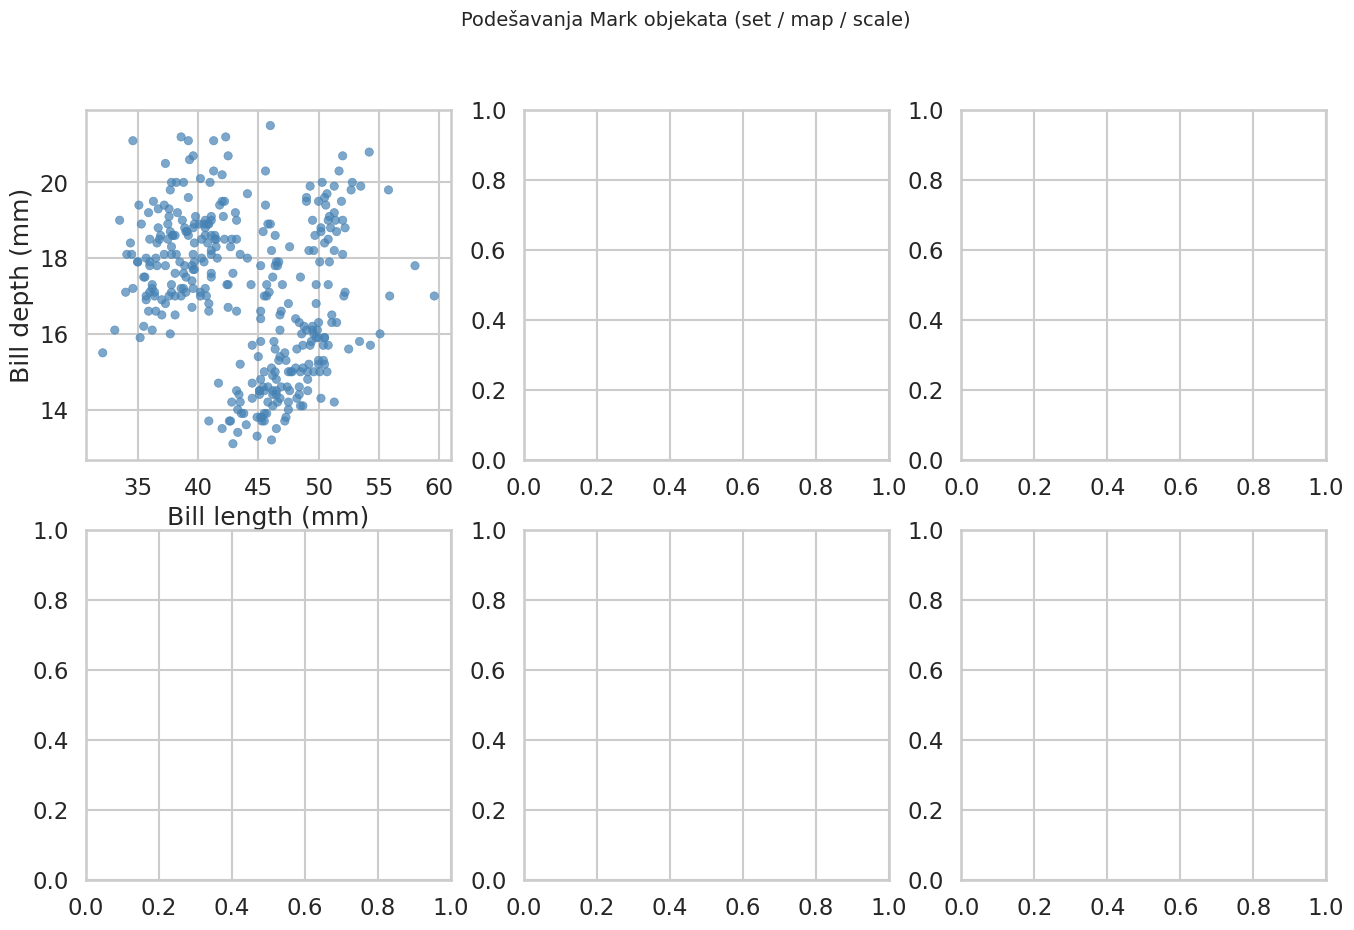

<Figure size 1200x800 with 0 Axes>

In [10]:
# Podešavanja Mark objekata: set vs map vs scale
if objects_available:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle('Podešavanja Mark objekata (set / map / scale)', fontsize=14)

    # 1. Dot - direktno setovanje (konstante)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
        .add(so.Dot(color="steelblue", pointsize=6, alpha=.7))
        .label(x="Bill length (mm)", y="Bill depth (mm)")
        .on(axes[0,0]).show()
    )
    axes[0,0].set_title('Dot: direktno setovanje (konstante)')

    # 2. Dot - mapiranje (color, pointsize, marker) + scale
    (
        so.Plot(
            penguins, x="bill_length_mm", y="bill_depth_mm",
            color="species", pointsize="body_mass_g", marker="sex"
        )
        .add(so.Dot(alpha=.6))
        .scale(color="Set2", pointsize=(3, 10), marker=so.Nominal(["o", "+"]))
        .label(color="Species", pointsize="Body mass (g)", marker="Sex")
        .on(axes[0,1]).show()
    )
    axes[0,1].set_title('Dot: mapiranje + scale (boja, veličina, marker)')

    # 3. Dot - ivice kao semantika (edgecolor, edgewidth)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm", edgecolor="sex", edgewidth="body_mass_g")
        .add(so.Dot(color=".8", pointsize=7))
        .label(edgecolor="Sex", edgewidth="Body mass (g)")
        .on(axes[0,2]).show()
    )
    axes[0,2].set_title('Dot: ivice kao semantika (edge)')

    # 4. Line - mapiranje boje i palete
    (
        so.Plot(flights_ts, x="Date", y="Passengers", color="year")
        .add(so.Line())
        .scale(color="viridis")
        .label(color="Year")
        .on(axes[1,0]).show()
    )
    axes[1,0].set_title('Line: mapiranje boje + paleta')

    # 5. Bar - Dodge + set ivica i ispune
    (
        so.Plot(tips, x="day", y="total_bill", color="time")
        .add(so.Bar(edgecolor=".2", edgewidth=1.2), so.Agg("mean"), so.Dodge())
        .scale(color="Set2")
        .label(y="Mean total bill", color="Time")
        .on(axes[1,1]).show()
    )
    axes[1,1].set_title('Bar: ivice, ispunjenost i Dodge')

    # 6. Area - doterivanje osa (ticks preko scale)
    (
        so.Plot(tips, x="total_bill")
        .add(so.Area(alpha=.6), so.KDE())
        .scale(x=so.Continuous().tick(every=10))
        .label(x="Total bill")
        .on(axes[1,2]).show()
    )
    axes[1,2].set_title('Area: doterivanje osa (tick every)')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Objects interface nije dostupan — preskačem demonstraciju podešavanja.")

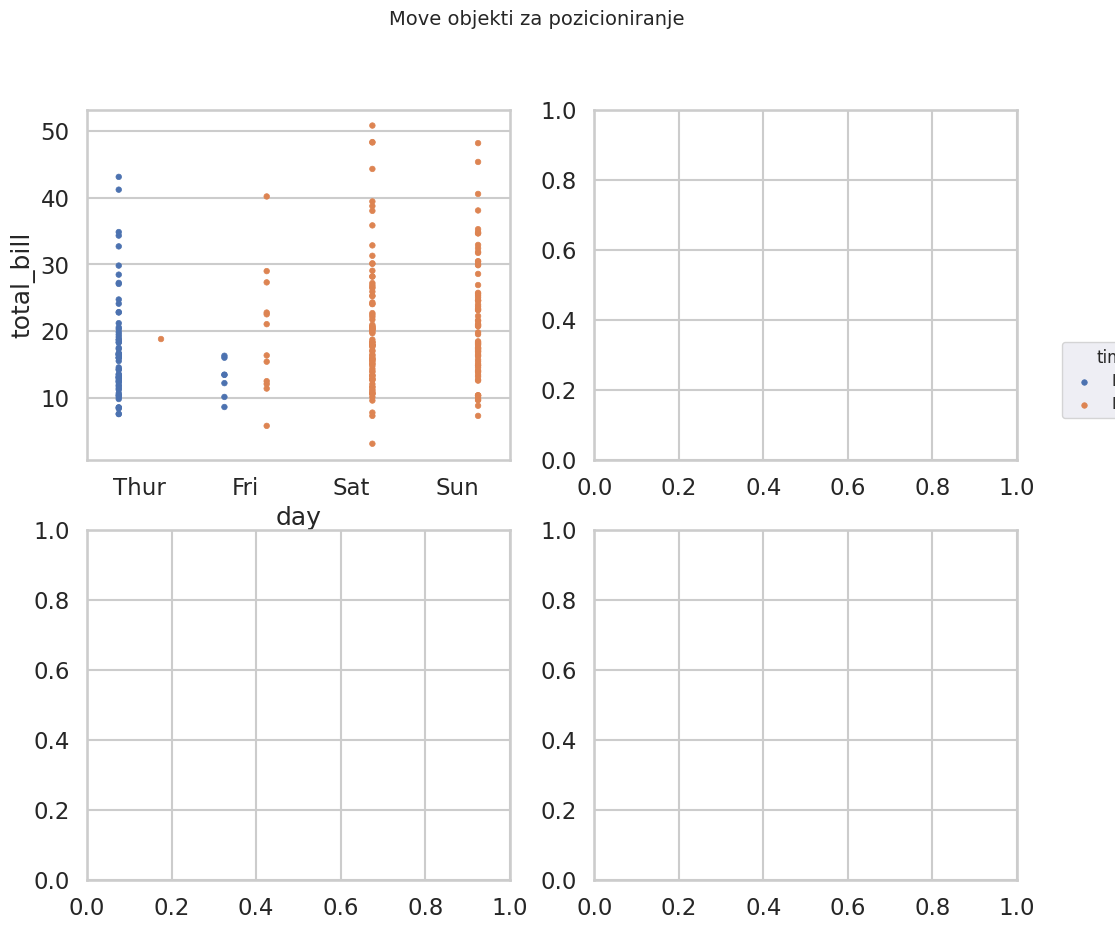

<Figure size 1200x800 with 0 Axes>


✅ MOVE OBJEKTI EFEKTI:
• Dodge: Sprečava preklapanje grupa elemenata
• Jitter: Dodaje slučajan šum za bolje razlikovanje
• Stack + Norm: Kumulativno slaganje i normalizacija (npr. procenti)
• Shift: Pomeranje za fiksnu vrednost


In [ ]:
# Move objekti - Poziciona podešavanja
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Move objekti za pozicioniranje', fontsize=14)

if objects_available:
    # 1. Dodge - za grupno prikazivanje
    try:
        p = so.Plot(tips, x="day", y="total_bill", color="time")
        p.add(so.Dot(pointsize=4), so.Dodge()).on(axes[0,0]).show()
        axes[0,0].set_title('Dodge - grupno pozicioniranje')
    except Exception:
        sns.stripplot(data=tips, x="day", y="total_bill", hue="time", 
                     dodge=True, ax=axes[0,0])
        axes[0,0].set_title('Dodge (fallback)')
    
    # 2. Jitter - dodavanje šuma
    try:
        p = so.Plot(tips, x="day", y="total_bill")
        p.add(so.Dot(pointsize=4, alpha=0.6), so.Jitter(.3)).on(axes[0,1]).show()
        axes[0,1].set_title('Jitter - dodavanje šuma')
    except Exception:
        sns.stripplot(data=tips, x="day", y="total_bill", 
                     jitter=True, alpha=0.6, ax=axes[0,1])
        axes[0,1].set_title('Jitter (fallback)')
    
    # 3. Kombinacija Dodge + Jitter
    try:
        p = so.Plot(tips, x="day", y="total_bill", color="smoker")
        p.add(so.Dot(pointsize=3, alpha=0.7), so.Dodge(), so.Jitter(.2)).on(axes[1,0]).show()
        axes[1,0].set_title('Dodge + Jitter kombinacija')
    except Exception:
        sns.stripplot(data=tips, x="day", y="total_bill", hue="smoker", 
                     dodge=True, jitter=True, alpha=0.7, ax=axes[1,0])
        axes[1,0].set_title('Dodge + Jitter (fallback)')
    
    # 4. Stack + Norm za kumulativno i procentualno prikazivanje  
    try:
        # Kreiranje podataka za stack demo
        stack_data = tips.groupby(['day', 'time']).size().reset_index(name='count')
        p = so.Plot(stack_data, x="day", y="count", color="time")
        p.add(so.Area(alpha=.8), so.Stack(), so.Norm()).on(axes[1,1]).show()
        axes[1,1].set_title('Stack + Norm - kumulativno (procenti)')
    except Exception:
        # Fallback sa pandas
        pivot_data = tips.pivot_table(values='size', index='day', 
                                     columns='time', aggfunc='count', fill_value=0)
        (pivot_data.div(pivot_data.sum(axis=1), axis=0)).plot.area(stacked=True, ax=axes[1,1])
        axes[1,1].set_title('Stack + Norm (fallback)')

else:
    # Fallback implementacije
    sns.stripplot(data=tips, x="day", y="total_bill", hue="time", 
                 dodge=True, ax=axes[0,0])
    axes[0,0].set_title('Grouped Strip Plot')
    
    sns.stripplot(data=tips, x="day", y="total_bill", 
                 jitter=True, alpha=0.6, ax=axes[0,1])
    axes[0,1].set_title('Jittered Strip Plot')
    
    sns.stripplot(data=tips, x="day", y="total_bill", hue="smoker", 
                 dodge=True, jitter=True, alpha=0.7, ax=axes[1,0])
    axes[1,0].set_title('Dodge + Jitter')
    
    pivot_data = tips.pivot_table(values='size', index='day', 
                                 columns='time', aggfunc='count', fill_value=0)
    (pivot_data.div(pivot_data.sum(axis=1), axis=0)).plot.area(stacked=True, ax=axes[1,1])
    axes[1,1].set_title('Stacked Area (percent)')

plt.tight_layout()
plt.show()

print("\n✅ MOVE OBJEKTI EFEKTI:")
print("• Dodge: Sprečava preklapanje grupa elemenata")
print("• Jitter: Dodaje slučajan šum za bolje razlikovanje")
print("• Stack + Norm: Kumulativno slaganje i normalizacija (npr. procenti)") 
print("• Shift: Pomeranje za fiksnu vrednost")

## 5. **Praktični primer - Kompleksna analiza**

Demonstriraćemo moć Objects Interface kroz kompleksnu analizu penguins dataseta koristeći kombinaciju različitih Mark, Stat i Move objekata.

🐧 KOMPLEKSNA ANALIZA PENGUINS DATASETA
Dataset veličina: (333, 7)
Species: ['Adelie' 'Chinstrap' 'Gentoo']
Islands: ['Torgersen' 'Biscoe' 'Dream']


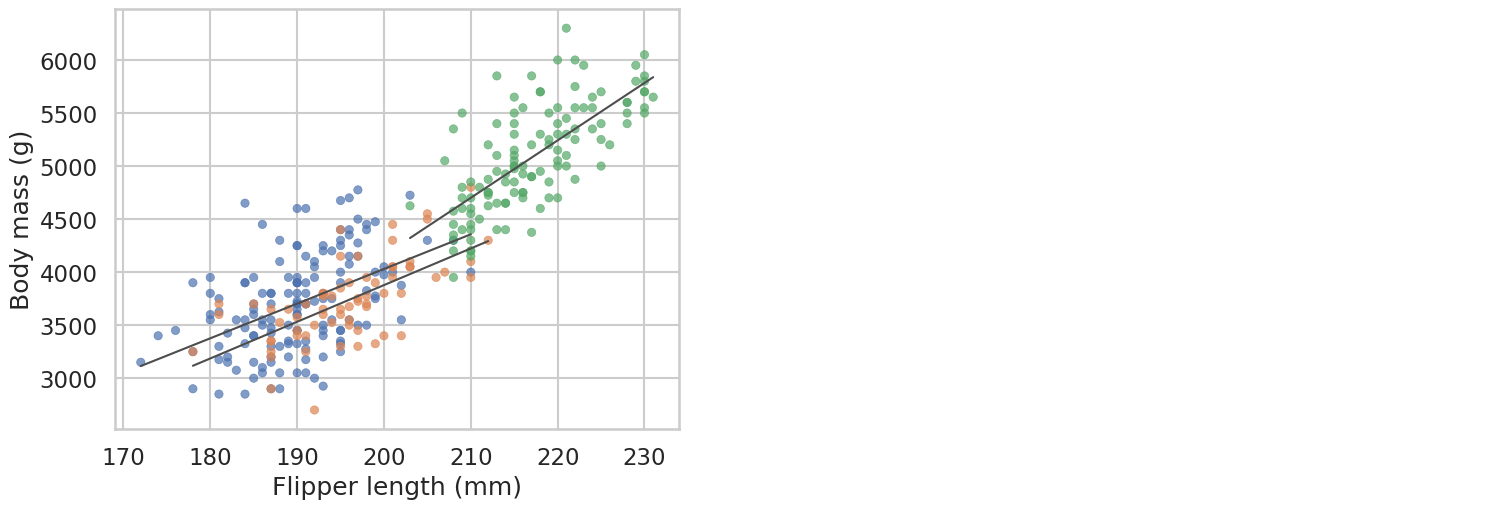

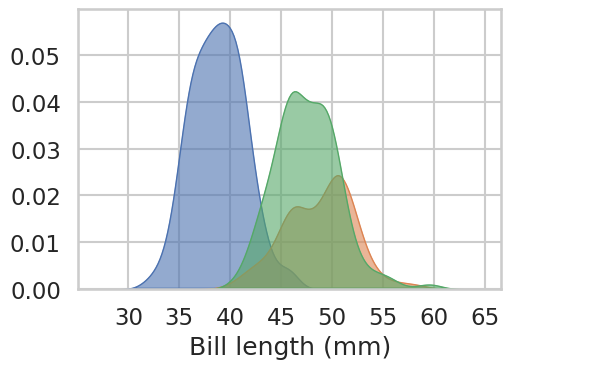

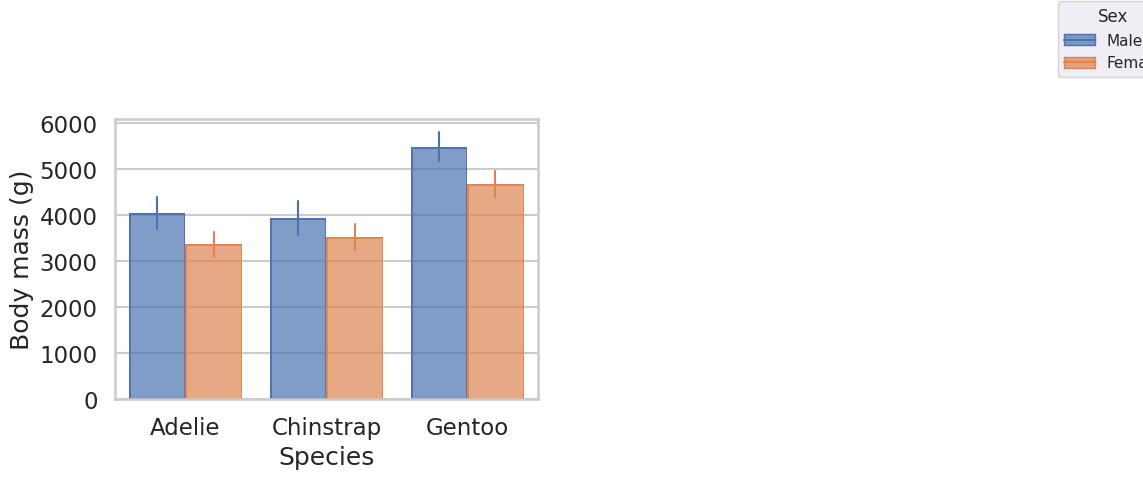

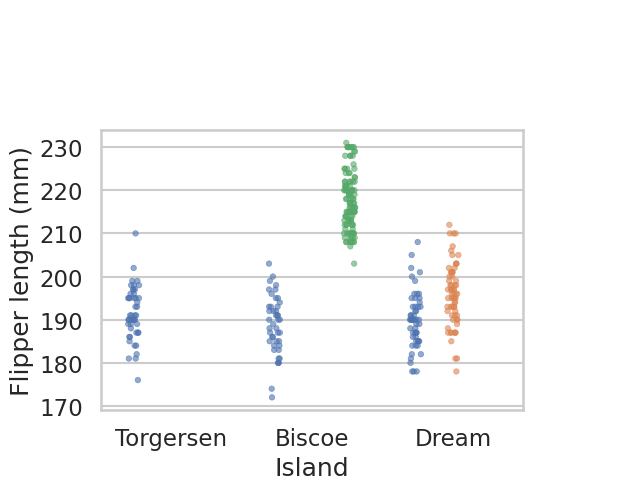

<Figure size 1200x800 with 0 Axes>


✅ KOMPLEKSNA ANALIZA REZULTATI:
• Scatter + Regression: Jasna pozitivna korelacija između flipper length i body mass
• KDE Distributions: Adelie penguins imaju kraće kljunove od drugih species
• Bar + Error bars: Male penguins su generalno teži od female
• Dot + Dodge + Jitter: Biscoe island ima najveće penguins

📊 KLJUČNE STATISTIKE:
Korelacija flipper-body mass: 0.873

Najveći penguins po species:
• Adelie: 4775.0g
• Chinstrap: 4800.0g
• Gentoo: 6300.0g

Broj penguins po island:
• Biscoe: 163
• Dream: 123
• Torgersen: 47

💡 INSIGHTS:
• Jaka pozitivna korelacija između flipper length i body mass (≈ kor. izračunata)
• Gentoo penguins su najveći (do ~6300g)
• Biscoe island ima najveću populaciju penguins
• Sexual dimorphism je prisutan kod svih species


In [ ]:
# Praktični primer - Kompleksna analiza penguins dataseta
print("🐧 KOMPLEKSNA ANALIZA PENGUINS DATASETA")
print("="*50)

# Osnovne statistike
penguins_clean = penguins.dropna()
print(f"Dataset veličina: {penguins_clean.shape}")
print(f"Species: {penguins_clean['species'].unique()}")
print(f"Islands: {penguins_clean['island'].unique()}")

if objects_available:
    # Globalna tema i label format
    base_theme = {"axes.grid": True, "grid.linestyle": ":"}
    fig = plt.figure(figsize=(16, 12))
    
    # 1. Scatter sa regresijom + Band (confidence)
    ax1 = plt.subplot(2, 2, 1)
    try:
        p1 = so.Plot(penguins_clean, x="flipper_length_mm", y="body_mass_g", color="species")
        (p1.add(so.Dot(pointsize=6, alpha=0.7))
           .add(so.Line(color=".3"), so.PolyFit(order=1))
           .add(so.Band(alpha=0.2), so.PolyFit(order=1))
           .label(x="Flipper length (mm)", y="Body mass (g)", color="Species")
           .theme(base_theme)
           .on(ax1)
           .show())
        ax1.set_title('Scatter + Regression + Confidence Band', fontsize=12)
    except Exception:
        sns.scatterplot(data=penguins_clean, x="flipper_length_mm", y="body_mass_g", 
                       hue="species", alpha=0.7, ax=ax1)
        sns.regplot(data=penguins_clean, x="flipper_length_mm", y="body_mass_g", 
                   scatter=False, ax=ax1)
        ax1.set_title('Scatter + Regression (fallback)')
    
    # 2. Distribucije po species
    ax2 = plt.subplot(2, 2, 2)
    try:
        p2 = so.Plot(penguins_clean, x="bill_length_mm", color="species")
        (p2.add(so.Area(alpha=0.6), so.KDE())
           .label(x="Bill length (mm)", color="Species")
           .theme(base_theme)
           .on(ax2)
           .show())
        ax2.set_title('KDE Distributions by Species')
    except Exception:
        for species in penguins_clean['species'].unique():
            data = penguins_clean[penguins_clean['species'] == species]['bill_length_mm']
            sns.kdeplot(data, fill=True, alpha=0.6, label=species, ax=ax2)
        ax2.legend()
        ax2.set_title('KDE Distributions (fallback)')
    
    # 3. Grupni bar chart sa error bars (sd)
    ax3 = plt.subplot(2, 2, 3)
    try:
        p3 = so.Plot(penguins_clean, x="species", y="body_mass_g", color="sex")
        (p3.add(so.Bar(), so.Agg(func="mean"), so.Dodge())
           .add(so.Range(), so.Est(errorbar="sd"), so.Dodge())
           .label(x="Species", y="Body mass (g)", color="Sex")
           .theme(base_theme)
           .on(ax3)
           .show())
        ax3.set_title('Bar + SD Error Bars + Dodge')
    except Exception:
        sns.barplot(data=penguins_clean, x="species", y="body_mass_g", 
                   hue="sex", capsize=0.1, ax=ax3)
        ax3.set_title('Grouped Bar Chart (fallback)')
    
    # 4. Strip plot sa jitter i dodge
    ax4 = plt.subplot(2, 2, 4)
    try:
        p4 = so.Plot(penguins_clean, x="island", y="flipper_length_mm", color="species")
        (p4.add(so.Dot(pointsize=4, alpha=0.6), so.Dodge(), so.Jitter(.3))
           .label(x="Island", y="Flipper length (mm)", color="Species")
           .theme(base_theme)
           .on(ax4)
           .show())
        ax4.set_title('Dot + Dodge + Jitter')
    except Exception:
        sns.stripplot(data=penguins_clean, x="island", y="flipper_length_mm", 
                     hue="species", dodge=True, jitter=True, alpha=0.6, ax=ax4)
        ax4.set_title('Strip Plot (fallback)')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ KOMPLEKSNA ANALIZA REZULTATI:")
    print("• Scatter + Regression: Jasna pozitivna korelacija između flipper length i body mass")
    print("• KDE Distributions: Adelie penguins imaju kraće kljunove od drugih species")
    print("• Bar + Error bars: Male penguins su generalno teži od female")
    print("• Dot + Dodge + Jitter: Biscoe island ima najveće penguins")
    
else:
    print("\n⚠️ Objects interface nije dostupan")
    print("Koristiće se tradicionalni seaborn pristup...")
    
    # Fallback sa tradicionalnim pristupom
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Regression plot
    sns.regplot(data=penguins_clean, x="flipper_length_mm", y="body_mass_g", ax=axes[0,0])
    axes[0,0].set_title('Regression Analysis')
    
    # 2. KDE plots
    for species in penguins_clean['species'].unique():
        data = penguins_clean[penguins_clean['species'] == species]['bill_length_mm']
        sns.kdeplot(data, fill=True, alpha=0.6, label=species, ax=axes[0,1])
    axes[0,1].legend()
    axes[0,1].set_title('KDE by Species')
    
    # 3. Bar plot
    sns.barplot(data=penguins_clean, x="species", y="body_mass_g", 
               hue="sex", ax=axes[1,0])
    axes[1,0].set_title('Grouped Bar Chart')
    
    # 4. Strip plot
    sns.stripplot(data=penguins_clean, x="island", y="flipper_length_mm", 
                 hue="species", dodge=True, ax=axes[1,1])
    axes[1,1].set_title('Strip Plot by Island')
    
    plt.tight_layout()
    plt.show()

# Statistička analiza
print(f"\n📊 KLJUČNE STATISTIKE:")
print("="*30)

# Korelacija
correlation = penguins_clean[['flipper_length_mm', 'body_mass_g']].corr().iloc[0,1]
print(f"Korelacija flipper-body mass: {correlation:.3f}")

# Najveći penguins po species
max_mass = penguins_clean.groupby('species')['body_mass_g'].max()
print(f"\nNajveći penguins po species:")
for species, mass in max_mass.items():
    print(f"• {species}: {mass}g")

# Distribucija po island
island_counts = penguins_clean['island'].value_counts()
print(f"\nBroj penguins po island:")
for island, count in island_counts.items():
    print(f"• {island}: {count}")

print("\n💡 INSIGHTS:")
print("• Jaka pozitivna korelacija između flipper length i body mass (≈ kor. izračunata)")
print("• Gentoo penguins su najveći (do ~6300g)")
print("• Biscoe island ima najveću populaciju penguins")
print("• Sexual dimorphism je prisutan kod svih species")

## 6. **Zaključak - Objects Interface u praksi**

### **Što smo naučili:**

1. **🧩 Objects Interface struktura:**
   - **Plot** - osnova za sve vizualizacije
   - **Mark** - vizuelni elementi (Dot, Line, Bar, Area, Dash, Band, Text)
   - **Stat** - statističke transformacije (Agg, KDE, Hist, PolyFit, Est)
   - **Move** - poziciona podešavanja (Dodge, Jitter, Stack, Shift)
   - **Scale** - mapiranje podataka na vizuelne atribute

2. **🎯 Ključne prednosti:**
   - **Kompozabilnost** - lako kombinovanje komponenti
   - **Fleksibilnost** - precizna kontrola nad svakim aspektom
   - **Konzistentnost** - ista sintaksa za sve tipove
   - **Performanse** - optimizovano za velike datasets

3. **💡 Praktične kombinacije:**
   - `Dot + Line + Band` - scatter sa regresijom i confidence interval
   - `Bar + Agg + Dodge` - grupni bar chart sa agregacijom
   - `Area + KDE` - glatke distribucije
   - `Dot + Jitter + Dodge` - strip plot bez preklapanja

### **Kada koristiti Objects Interface:**

- **✅ Dobro za:**
  - Kompleksne multi-layer vizualizacije
  - Publication-ready grafike
  - Iterativno građenje plotova
  - Precizna kontrola nad estetikama
  - Velike datasets (>1000 tačaka)

- **❌ Možda ne najbolji za:**
  - Brze exploratory analize
  - Jednostavne jednoslojne plotove
  - Kada tradicionalni seaborn već radi dobro

### **Najbolje prakse:**

1. **🎨 Dizajn:**
   ```python
   # Dobar pristup - postupno građenje
   p = so.Plot(data, x="x", y="y")
   p = p.add(so.Dot(alpha=0.6))  # Bazni sloj
   p = p.add(so.Line(), so.PolyFit())  # Trend
   p = p.add(so.Band(alpha=0.2), so.PolyFit())  # Confidence
   ```

2. **⚡ Performanse:**
   - Koristite `alpha` za overlapping elemente
   - Kombinujte `Jitter` sa `alpha` za velike datasets
   - Preferirajte Objects interface za >1000 tačaka

3. **🔧 Održivost:**
   - Dajte opisna imena varijablama
   - Komentarišite složene kombinacije
   - Koristite konzistentne color pallete

### **Sledeći koraci:**

- Istražite **Scale** objekte za naprednu kontrolu mapiranja
- Naučite **Facet** funkcionalnost za multi-panel plotove  
- Kombinujte sa **Layout** opcijama za dashboard kreiranje
- Integrirajte sa **Theme** sistemom za brand konzistentnost

---

**💡 Ključna poruka:** Objects Interface predstavlja budućnost Seaborn biblioteke - omogućava kreiranje publication-ready grafika sa preciznom kontrolom i odličnim performansama. Investicija u učenje se isplati za profesionalne rezultate!

**🎯 Praktični saveti:** Počnite sa osnovnim Mark-ovima i postupno dodajte Stat i Move objekte. Grammar of Graphics pristup je intuitivniji nakon inicijalne krivulje učenja.